In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv('soccer.csv')
df.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


In [4]:
df.shape

(660, 15)

In [5]:
df.isnull().sum()
df.nunique()

Country                      9
League                      28
Club                       180
Player Names               444
Matches_Played              37
Substitution                21
Mins                       583
Goals                       34
xG                         558
xG Per Avg Match            92
Shots                      144
OnTarget                    79
Shots Per Avg Match        280
On Target Per Avg Match    184
Year                         5
dtype: int64

# Q1: What is the total number of goals scored in the entire dataset?




In [6]:
# Total numbers of goals scored in dataset is sum of goals column

df['Goals'].sum()

7795

# Q2: Which player has scored the most goals as a substitution

In [7]:
# Group by players so that their total substitution can be calculated
# Sort them

df.groupby('Player Names')['Substitution '].sum().sort_values(ascending = False).head(1)

Player Names
Nils Petersen    47
Name: Substitution , dtype: int64

# Q3: Find the top 5 players with the most number of goals scored. Also find the total number of goals scored by them

In [8]:
# Grouping by players and finding out the total number of goals
# Then sorting so that top 5 players can be find out

df.groupby('Player Names')['Goals'].sum().sort_values(ascending = False).head(5)

Player Names
Lionel Messi          135
Cristiano Ronaldo     128
Robert Lewandowski    127
Ciro Immobile         107
Luis Suarez            95
Name: Goals, dtype: int64

# Q4: What are the top 10 countries with the most number of players in the dataset?

In [9]:
# Given data has 9 distinct countries, sort them according to most number of unique players

df.groupby(['Country'])['Player Names'].nunique().sort_values(ascending = False).head(10)

Country
Brazil          76
Germany         62
Spain           62
England         55
Italy           55
France          47
Portugal        37
 Netherlands    34
USA             34
Name: Player Names, dtype: int64

# Q5: # Q1. Create a new dataframe after removing the ourliers for Mins Column in the dataset (conside the upper quantile to be 99 percentile and the lower quantile to be 1 percentile.). After that Find the difference in the number of rows?

* Difference is df.shape(only rows) - df.shape(rows of filtered data only)

In [10]:
# Setting the percentile
P = np.percentile(df.Mins, [1, 99])

# Creating new dataframe as per given conditions
new_df = df[(df.Mins > P[0]) & (df.Mins < P[1])]

# Finding out the difference in rows of both dataframe
len(df.index) - len(new_df.index)

14

# Q6: Which top 5 players have scored the maximum number of goals throughout all the years? Display them in descending order

In [11]:
# Grouping by players and finding out the total number of goals
# Then sorting so that top 5 players can be find out

df.groupby('Player Names')['Goals'].sum().sort_values(ascending = False).head(5)

Player Names
Lionel Messi          135
Cristiano Ronaldo     128
Robert Lewandowski    127
Ciro Immobile         107
Luis Suarez            95
Name: Goals, dtype: int64

# Q7. Using Bar Plot show in which year has Cristiano Ronaldo scored the most number of goals?

[Text(0.5, 1.0, "Cristiano Ronaldo's Performance")]

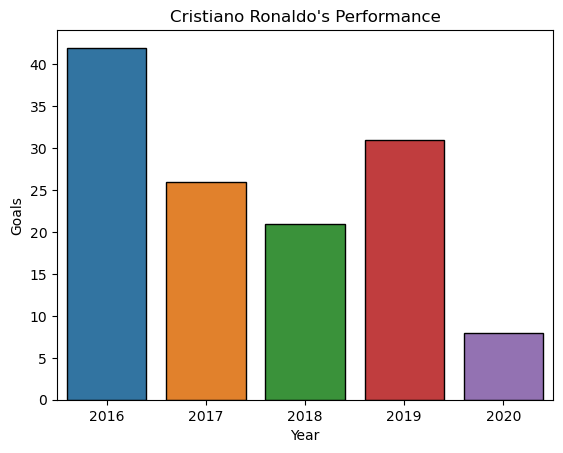

In [12]:
# Extracting data of only Ronaldo
data = df[df['Player Names'] == 'Cristiano Ronaldo']

# Displaying bar plot using seaborn
sns.barplot(data = data, x ='Year', y = 'Goals', edgecolor = 'black').set(title = 'Cristiano Ronaldo\'s Performance')

# Q8. In the year 2019 who has more Goals between Ronaldo and Messi? 
- First print them normally 
- Display the comparison using a bar plot

In [13]:
# Listing the given players
Players = ['Lionel Messi', 'Cristiano Ronaldo']

# Dataframe containing given players only
data = df[df['Player Names'].isin(Players)]

# Finding for the particular year 2019
data = data[data['Year'] == 2019]

print(data[['Player Names','Goals']])

          Player Names  Goals
333       Lionel Messi     25
385  Cristiano Ronaldo     31


<Axes: title={'center': 'Comparision between Ronaldo and Messi in 2019'}, xlabel='Player Names', ylabel='Number of Goals'>

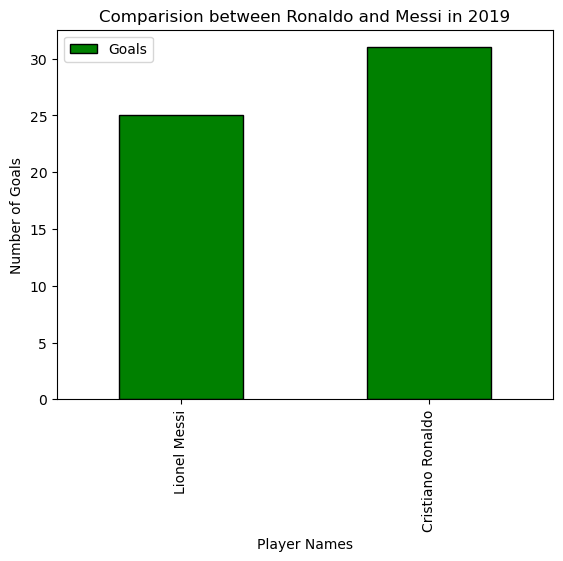

In [14]:
# Plotting the comparison between two players

data.plot(kind = 'bar', x = 'Player Names', y = 'Goals', color = 'Green', ylabel = 'Number of Goals', edgecolor = 'black', title = 'Comparision between Ronaldo and Messi in 2019')

# Q9: Using Pie Chart show the amount of data various Countries are containing in this dataset(use the Country Columns Display the percentage of data as well in the pie chart

<Axes: >

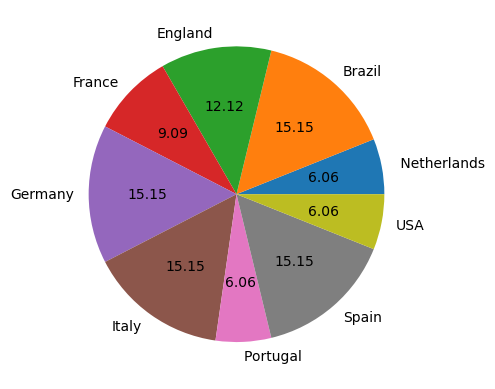

In [15]:
df.groupby('Country').size().plot(kind = 'pie', autopct = '%.2f')

# Q10: Display a Heatmap  to show the correlation between the columns in the dataset. The heatmap should have the value of the correlation printed within the boxes.

/tmp/ipykernel_24172/4163739605.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

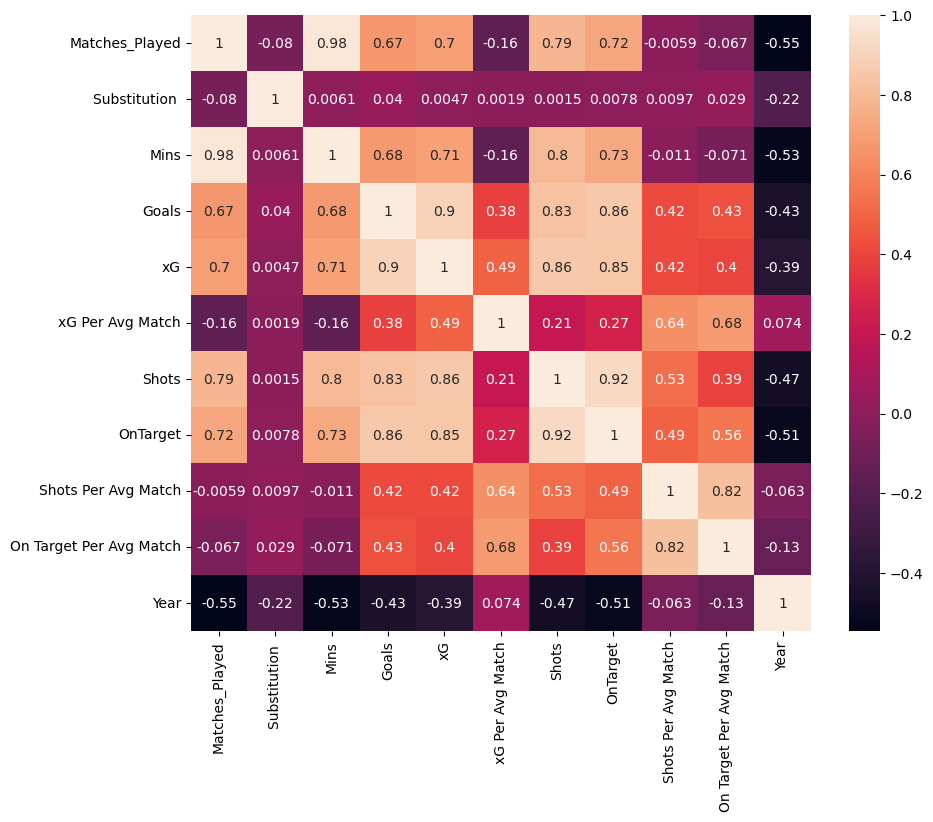

In [16]:
# Setting the figure size
f, ax = plt.subplots(figsize=(10, 8))

# Making heatmap using correlation coefficients of columns
sns.heatmap(df.corr(), annot = True)

# Q11: Which Country has the maximum median OnTarget Shots among all the Countries in the year 2020?

In [17]:
data = df[df['Year']==2020]
data.groupby('Country').OnTarget.median().sort_values(ascending = False).head(1)

Country
 Netherlands    25.5
Name: OnTarget, dtype: float64

# Q12. Who has the best average  Goals per minute?
* Consider only those players who have played more than 30 games
* Then Find Goals per minute
* Find Mean of Goals per minute and sort the values

In [18]:
data = df[df['Matches_Played'] > 30]
data['Goals per minute'] = data['Goals']/data['Mins']
data.groupby('Player Names')['Goals per minute'].mean().sort_values(ascending = True).tail(1)

/tmp/ipykernel_24172/3688639303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Goals per minute'] = data['Goals']/data['Mins']


Player Names
Carlos Vela    0.011509
Name: Goals per minute, dtype: float64

# Q 13. Which Player has the least and most number of missed shots in the dataset?
* Missed Shots=Shots-On Target

In [19]:
data = df
data['Missed Shots'] = data['Shots'] - data['OnTarget']
print(data.groupby('Player Names')['Missed Shots'].sum().sort_values(ascending = True).head(1))
print(data.groupby('Player Names')['Missed Shots'].sum().sort_values(ascending = True).tail(1))

Player Names
Esteban Burgos    1
Name: Missed Shots, dtype: int64
Player Names
Cristiano Ronaldo    455
Name: Missed Shots, dtype: int64


# Q14: How many countries have had players who played more than 35 matches? Create a bar plot to display the count for each country.

['Spain' 'Italy' 'England' 'Brazil' 'France']


<Axes: title={'center': 'Bar Plot Showing count for each country'}, xlabel='Country', ylabel='Players who played more than 35 matches'>

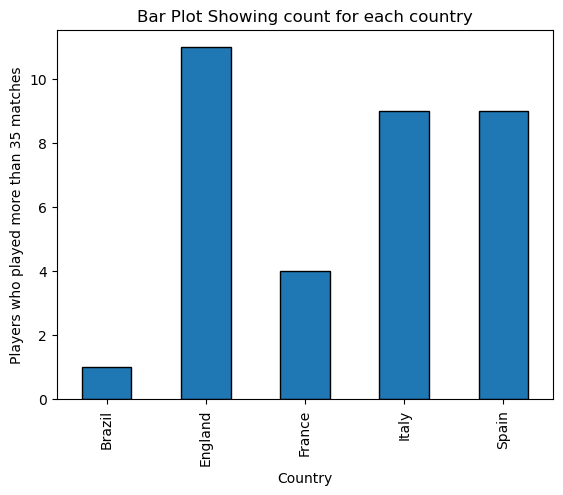

In [20]:
data = df[df['Matches_Played']>35]
print(data.Country.unique())
data = data.groupby('Country').size()
data.plot(kind = 'bar', x= 'Country', y = 'Player Names', edgecolor = 'black', ylabel = 'Players who played more than 35 matches', title = 'Bar Plot Showing count for each country')

# Q15: Draw a Line Chart to show the comparison of the top 5 highest scoring players in the dataset throughout the years(2016-2020)

In [21]:
df.Year.unique()
data = df.groupby('Player Names')['Goals'].sum().sort_values(ascending = False).head(5)
Player = data.index
data1 = df[df['Player Names'].isin(Player)]

[Text(0.5, 1.0, 'Top 5 Players Journey')]

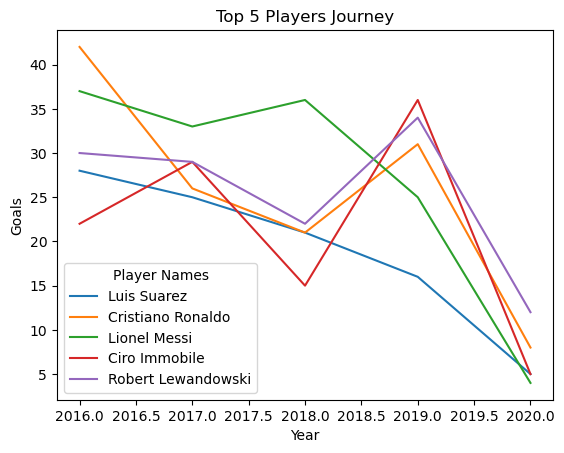

In [22]:
sns.lineplot(data=data1, x='Year',y = 'Goals', hue = 'Player Names').set(title = 'Top 5 Players Journey')